# Data Analysis Report on Autistic Population
The dataset used is linked here: https://www.kaggle.com/datasets/andrewmvd/autism-screening-on-adults

~ Irvin Sachdeva, CH23B088

In [240]:
# importing the requisite libs
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [241]:
csv = pd.read_csv("Autism_Data_Adult.csv")
df = pd.DataFrame(csv)

In [242]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


## Info about the dataset
ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as no or yes

#### Checking all columns, replacing missing values

In [243]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [244]:
df['age'].value_counts()

age
21.0     49
20.0     46
23.0     37
22.0     37
19.0     35
24.0     34
27.0     31
18.0     31
30.0     30
26.0     28
25.0     27
29.0     27
28.0     24
31.0     21
17.0     18
32.0     18
35.0     17
37.0     17
33.0     16
40.0     16
42.0     15
36.0     13
38.0     12
34.0     12
43.0     11
44.0     10
47.0      8
39.0      7
53.0      6
55.0      6
46.0      6
50.0      5
52.0      5
45.0      4
48.0      4
49.0      3
41.0      3
58.0      2
54.0      2
56.0      2
61.0      2
59.0      1
64.0      1
60.0      1
383.0     1
51.0      1
Name: count, dtype: int64

In [245]:
# there is one extreme value, 383, we remove that
df=df.drop(df[df['age']==383].index)

In [246]:
df['age'].value_counts()

age
21.0    49
20.0    46
23.0    37
22.0    37
19.0    35
24.0    34
18.0    31
27.0    31
30.0    30
26.0    28
29.0    27
25.0    27
28.0    24
31.0    21
32.0    18
17.0    18
35.0    17
37.0    17
33.0    16
40.0    16
42.0    15
36.0    13
34.0    12
38.0    12
43.0    11
44.0    10
47.0     8
39.0     7
53.0     6
55.0     6
46.0     6
50.0     5
52.0     5
45.0     4
48.0     4
49.0     3
41.0     3
56.0     2
61.0     2
54.0     2
58.0     2
60.0     1
59.0     1
64.0     1
51.0     1
Name: count, dtype: int64

In [247]:
#handling null values
df['age'] = df['age'].fillna(round(df['age'].mean()))

In [248]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [249]:
df['gender'].value_counts()

gender
m    367
f    336
Name: count, dtype: int64

In [250]:
df['ethnicity'].value_counts()

ethnicity
White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
others               1
Name: count, dtype: int64

In [251]:
# handling '?'s
df['ethnicity']=df['ethnicity'].replace('?','Others')

In [252]:
df['ethnicity'].value_counts()

ethnicity
White-European     233
Others             125
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
others               1
Name: count, dtype: int64

In [269]:
df['ethnicity']=df['ethnicity'].replace('others','Others')

In [270]:
df['ethnicity'].value_counts()

ethnicity
White-European     233
Others             126
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
Name: count, dtype: int64

In [253]:
df['jundice'].value_counts()

jundice
no     634
yes     69
Name: count, dtype: int64

In [254]:
df['austim'].value_counts()

austim
no     612
yes     91
Name: count, dtype: int64

#### Plotting graphs

In [255]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [256]:
plt.style.use('default')

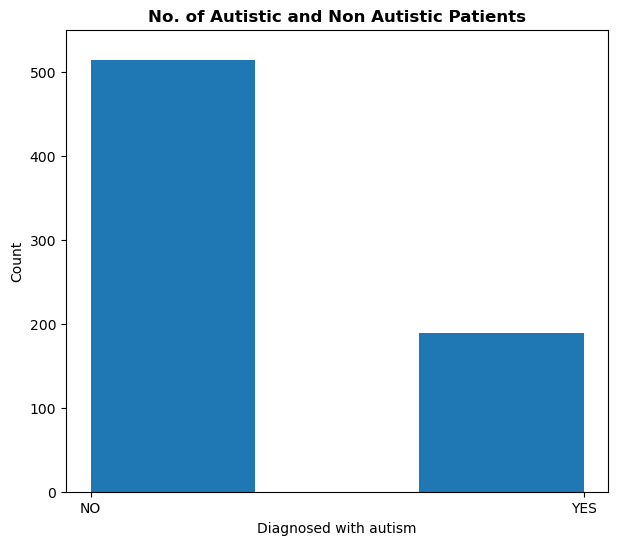

In [257]:
fig, ax = plt.subplots( figsize=(7,6))
hist1 = ax.hist(df["Class/ASD"], bins = 3);
ax.set(xlabel="Diagnosed with autism", ylabel = "Count");
ax.set_title("No. of Autistic and Non Autistic Patients", fontweight='bold');
ax.set_ylim([0,550]);

In [258]:
# creating a separate dataset for autistic patients
df_autistic = df[df['Class/ASD'] == 'YES']
df_autistic.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,United States,no,9.0,18 and more,Self,YES
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8.0,18 and more,Health care professional,YES
10,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,no,United States,no,10.0,18 and more,Relative,YES
31,1,0,0,1,1,1,1,1,0,1,...,f,White-European,no,yes,United States,no,7.0,18 and more,Self,YES


In [259]:
df_autistic['ethnicity'].value_counts()

ethnicity
White-European     109
Others              18
Black               18
Asian               16
Latino              10
Middle Eastern       8
Hispanic             5
South Asian          3
Turkish              1
Pasifika             1
Name: count, dtype: int64

In [260]:
# creating a separate dataset for non autistic patients
df_non = df[df['Class/ASD'] == 'NO']
df_non

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,Others,no,no,Egypt,no,2.0,18 and more,?,NO
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,United States,no,2.0,18 and more,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1,0,0,1,0,0,0,1,0,1,...,f,White-European,no,no,United Kingdom,no,4.0,18 and more,Self,NO
695,1,0,1,1,0,0,1,1,0,0,...,m,Latino,no,no,Brazil,yes,5.0,18 and more,Parent,NO
697,1,1,1,1,1,0,0,0,0,1,...,f,Asian,no,no,Philippines,no,6.0,18 and more,Self,NO
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO


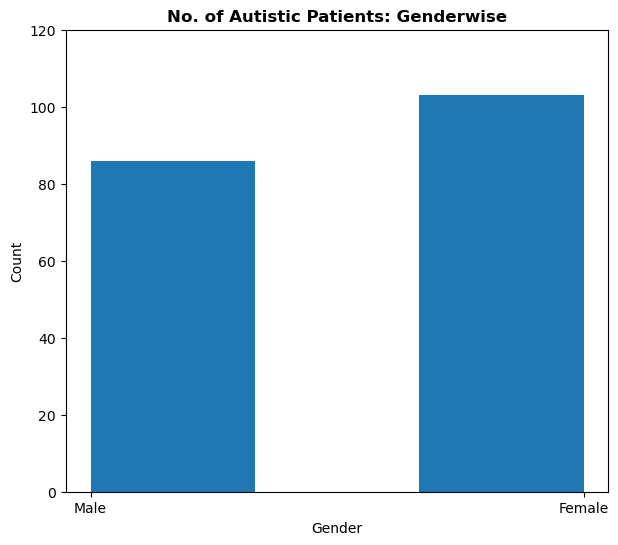

In [261]:
fig, ax = plt.subplots( figsize=(7,6))
hist2 = ax.hist(df_autistic["gender"], bins = 3);
ax.set(xlabel="Gender", ylabel = "Count");
ax.set_title("No. of Autistic Patients: Genderwise", fontweight='bold');
plt.xticks([0,1],labels=['Male','Female']);
ax.set_ylim([0,120]);

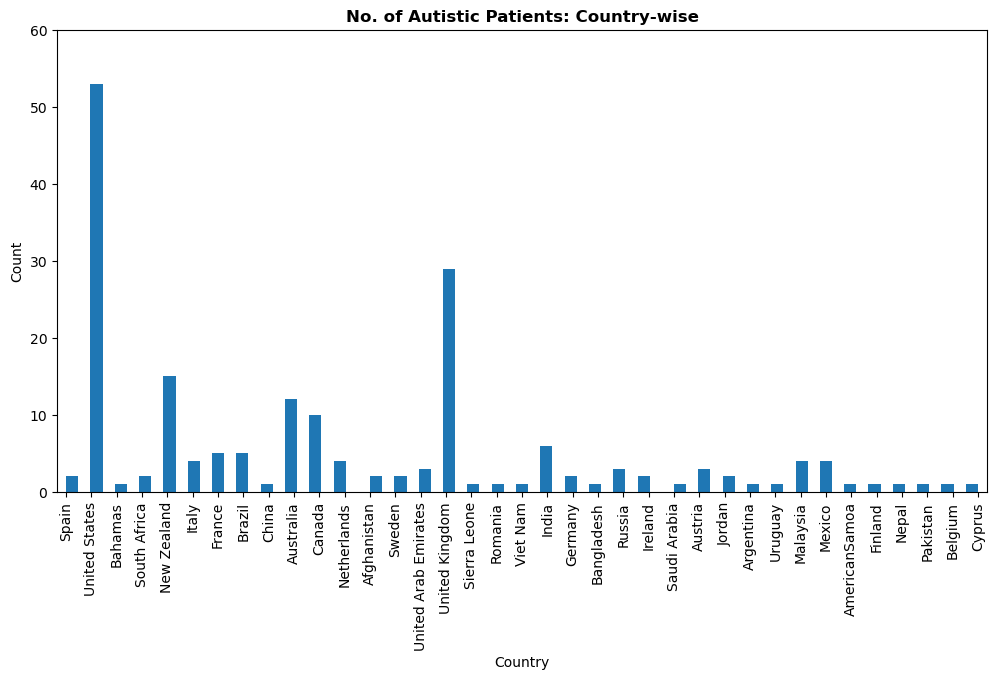

In [262]:
fig, ax = plt.subplots(figsize=(12,6))
hist3 = ax.hist(df_autistic["contry_of_res"], bins=75);
ax.set(xlabel="Country", ylabel = "Count", xmargin=0.01);
ax.set_title("No. of Autistic Patients: Country-wise", fontweight='bold');
plt.xticks(rotation='vertical')
ax.set_ylim([0,60]);

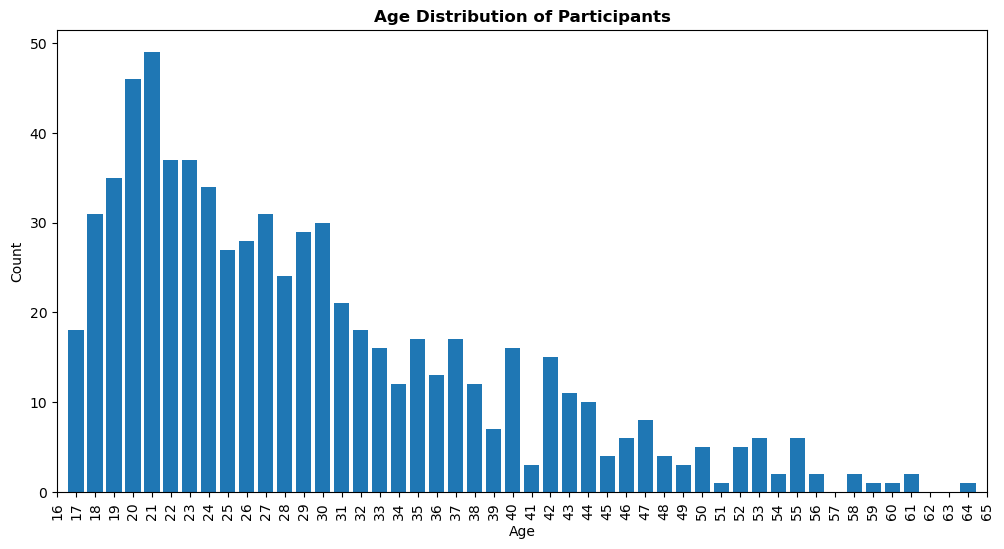

In [263]:
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(df['age'].value_counts().index, df['age'].value_counts())
ax.set(xlabel='Age', ylabel="Count", xlim=[16,65]);
ax.set_title('Age Distribution of Participants', fontweight='bold')
plt.xticks(np.arange(16,66), rotation = 'vertical');

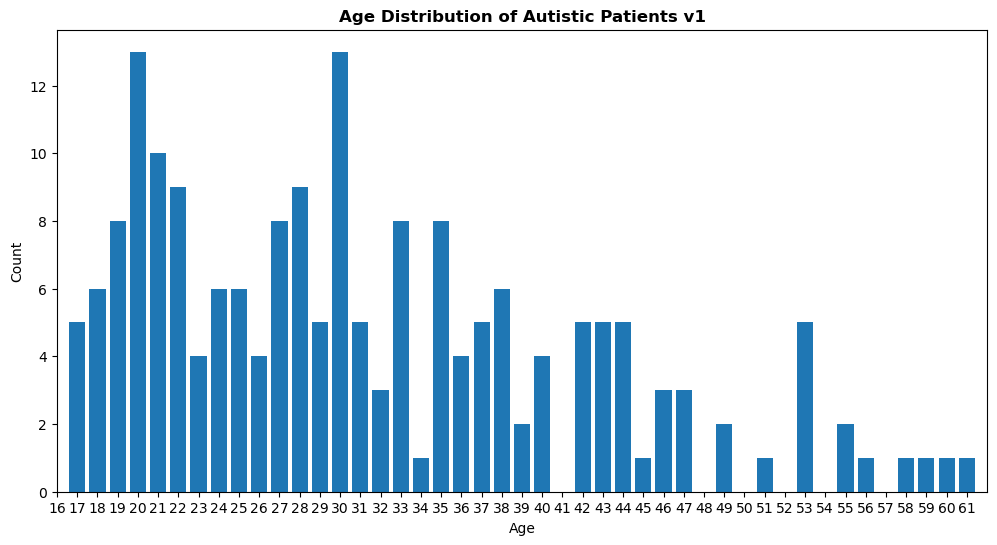

In [264]:
fig, ax = plt.subplots(figsize=(12,6))
bar2 = ax.bar(df_autistic['age'].value_counts().index, df_autistic['age'].value_counts())
ax.set(xlabel = 'Age', ylabel='Count', xlim = [16,62])
ax.set_title("Age Distribution of Autistic Patients v1", fontweight='bold');
plt.xticks(np.arange(16,62));

In [265]:
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '60-70']

age_group = pd.cut(df_autistic['age'], bins=bins, labels=labels)

# Count the number of individuals in each age group
age_distribution = age_group.value_counts().sort_index()
age_distribution


age
11-20    32
21-30    74
31-40    46
41-50    24
51-60    12
60-70     1
Name: count, dtype: int64

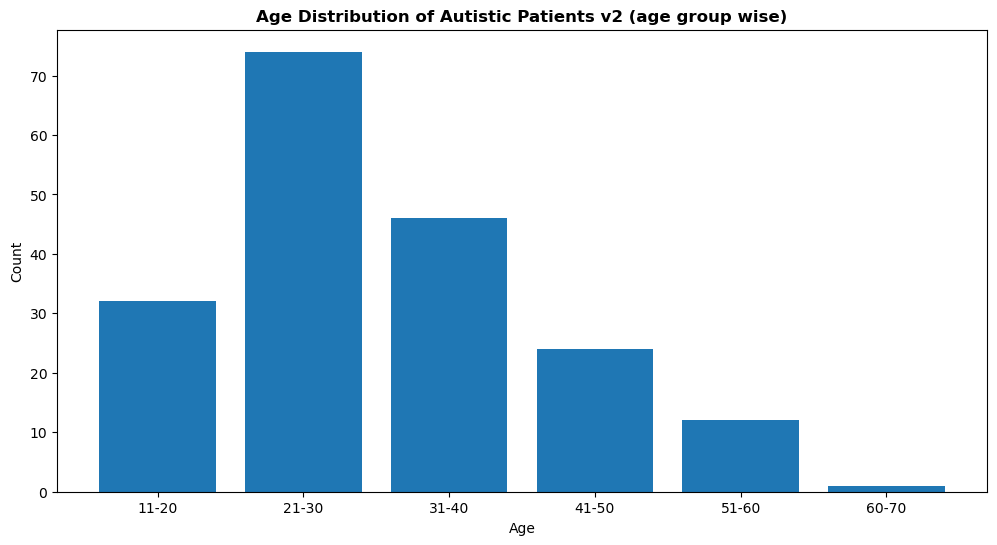

In [266]:
fig, ax = plt.subplots(figsize=(12,6))
bar2 = ax.bar(age_distribution.index, age_distribution)
ax.set(xlabel = 'Age', ylabel='Count')
ax.set_title("Age Distribution of Autistic Patients v2 (age group wise)", fontweight='bold');


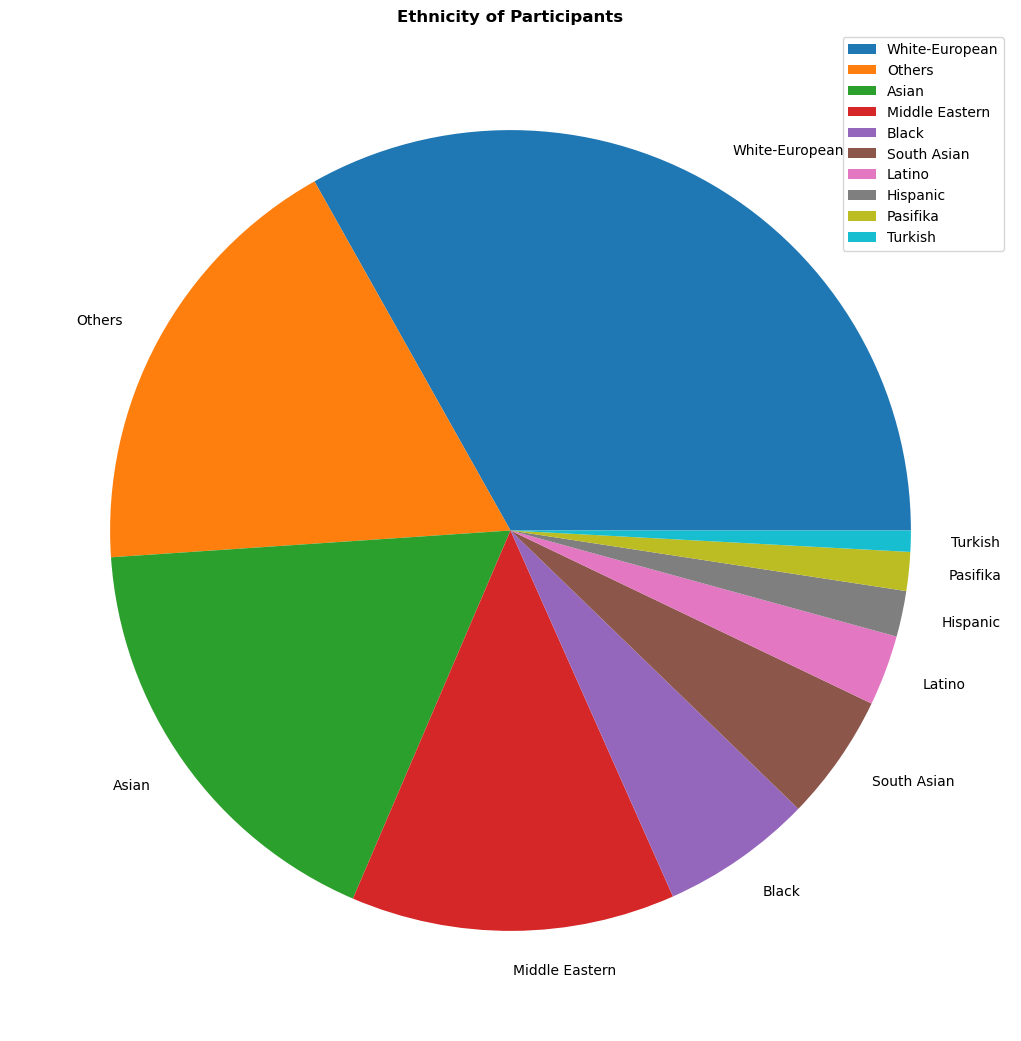

In [271]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15,13))
pie1=ax.pie(df['ethnicity'].value_counts(), labels=df['ethnicity'].value_counts().index)
ax.set_title("Ethnicity of Participants", fontweight='bold');
ax.legend(df['ethnicity'].value_counts().index, loc = 'upper right');

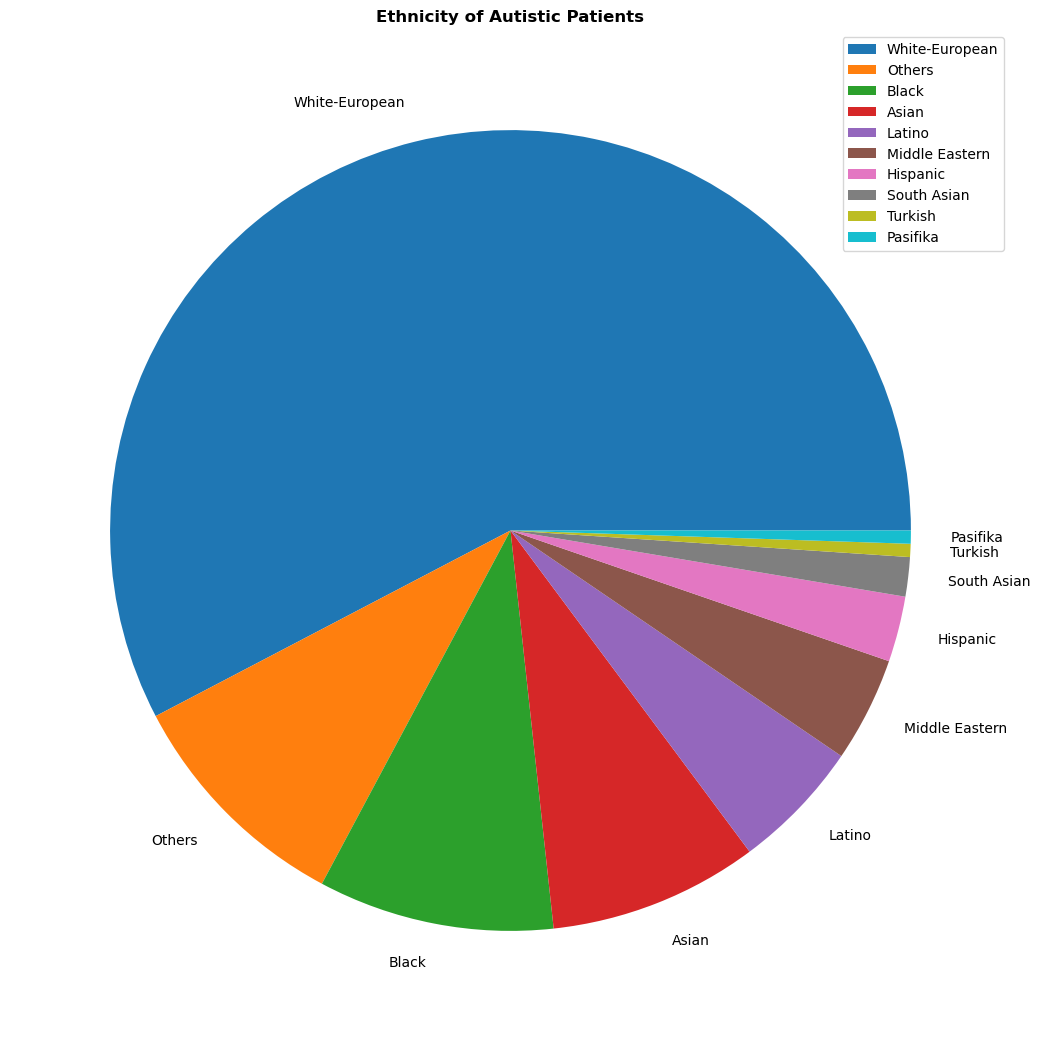

In [272]:
fig, ax = plt.subplots(figsize=(15,13))
pie1=ax.pie(df_autistic['ethnicity'].value_counts(), labels=df_autistic['ethnicity'].value_counts().index)
ax.set_title("Ethnicity of Autistic Patients", fontweight='bold');
ax.legend(df_autistic['ethnicity'].value_counts().index, loc = 'upper right');

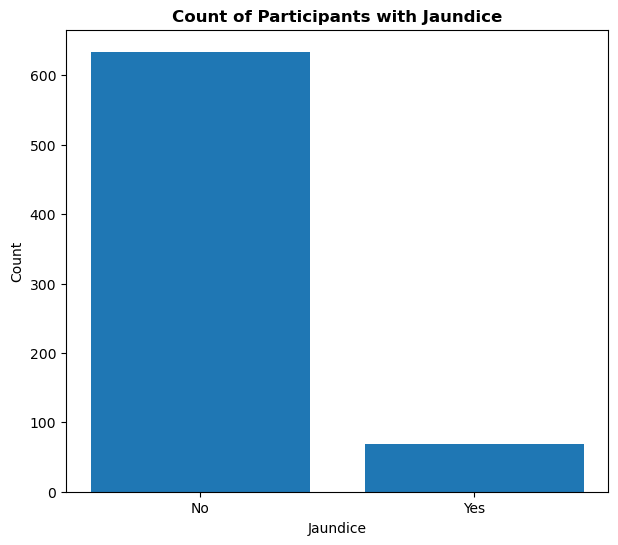

In [284]:
fig, ax = plt.subplots( figsize=(7,6))
bar4 = ax.bar(df["jundice"].value_counts().index,df["jundice"].value_counts());
ax.set(xlabel="Jaundice", ylabel = "Count");
ax.set_title("Count of Participants with Jaundice", fontweight='bold');
plt.xticks([0,1],labels=['No','Yes']);

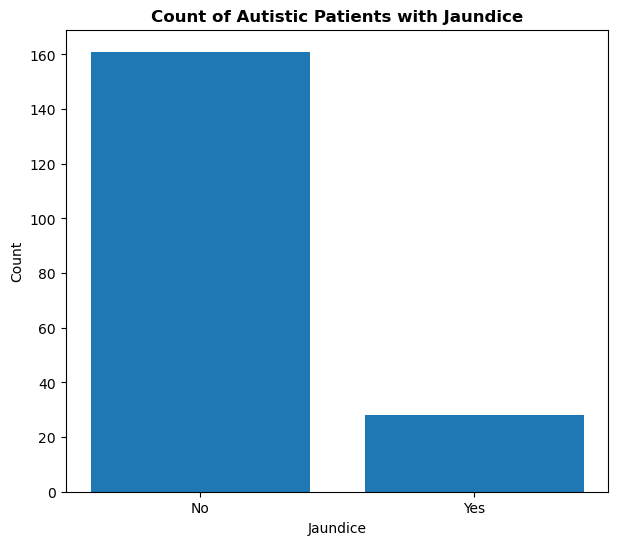

In [288]:
fig, ax = plt.subplots( figsize=(7,6))
bar4 = ax.bar(df_autistic["jundice"].value_counts().index,df_autistic["jundice"].value_counts());
ax.set(xlabel="Jaundice", ylabel = "Count");
ax.set_title("Count of Autistic Patients with Jaundice", fontweight='bold');
plt.xticks([0,1],labels=['No','Yes']);

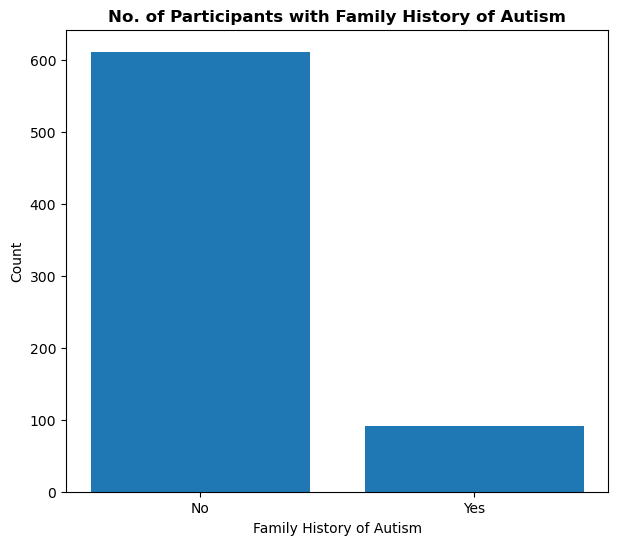

In [299]:
fig, ax = plt.subplots( figsize=(7,6))
bar4 = ax.bar(df["austim"].value_counts().index,df["austim"].value_counts());
ax.set(xlabel="Family History of Autism", ylabel = "Count");
ax.set_title("No. of Participants with Family History of Autism", fontweight='bold');
plt.xticks([0,1],labels=['No','Yes']);

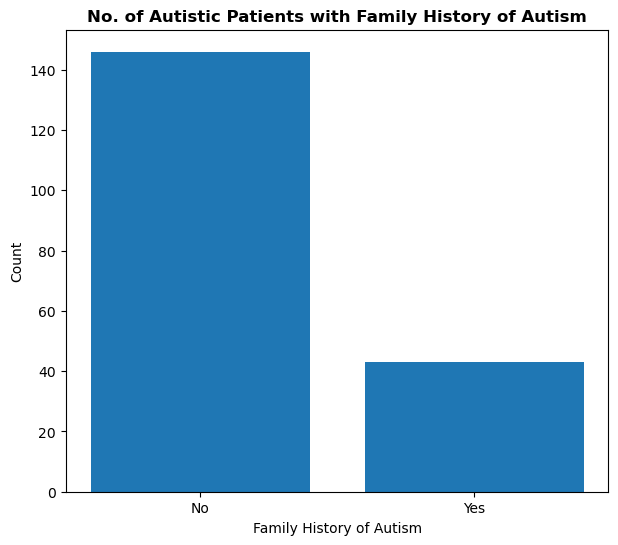

In [291]:
fig, ax = plt.subplots( figsize=(7,6))
bar4 = ax.bar(df_autistic["austim"].value_counts().index,df_autistic["austim"].value_counts());
ax.set(xlabel="Family History of Autism", ylabel = "Count");
ax.set_title("No. of Autistic Patients with Family History of Autism", fontweight='bold');
plt.xticks([0,1],labels=['No','Yes']);

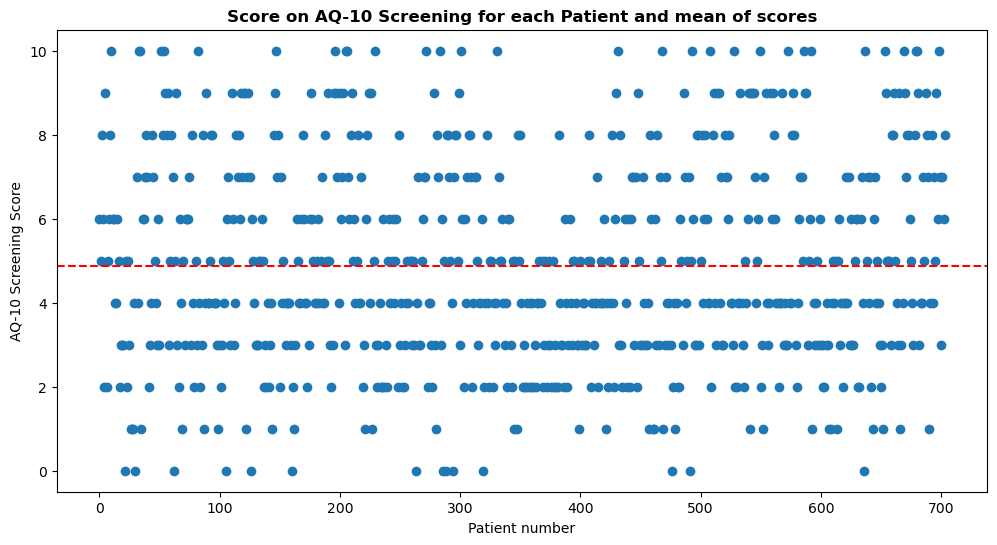

In [313]:
fig, ax = plt.subplots(figsize=(12,6))
scatter1 = ax.scatter(df["result"].index,df["result"]);
ax.set(xlabel="Patient number", ylabel = "AQ-10 Screening Score");
ax.set_title("Score on AQ-10 Screening for each Patient and mean of scores", fontweight='bold');
ax.axhline(df['result'].mean(), c='red', linestyle='--');

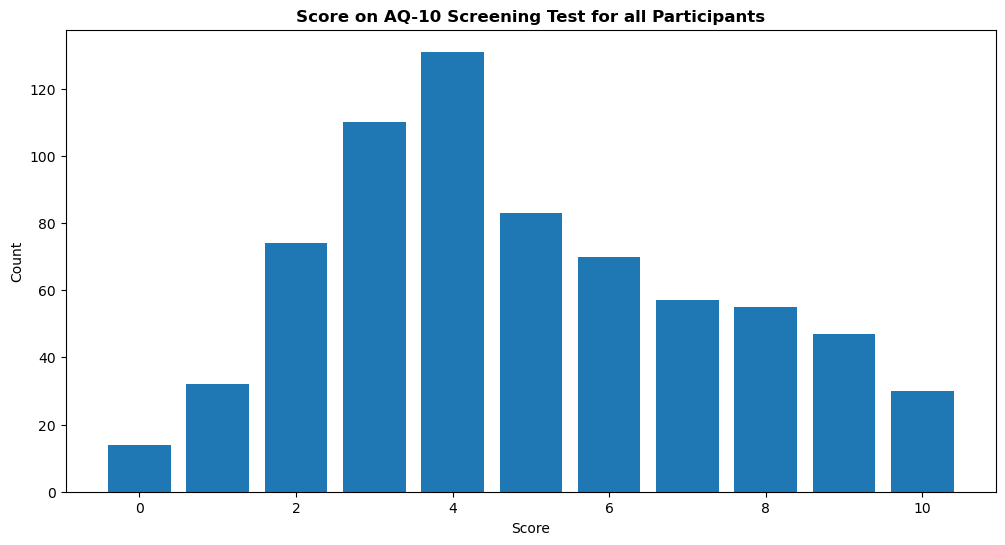

In [316]:
fig, ax = plt.subplots(figsize=(12,6))
bar4 = ax.bar(df["result"].value_counts().index,df["result"].value_counts());
ax.set(xlabel="Score", ylabel = "Count");
ax.set_title("Score on AQ-10 Screening Test for all Participants", fontweight='bold');

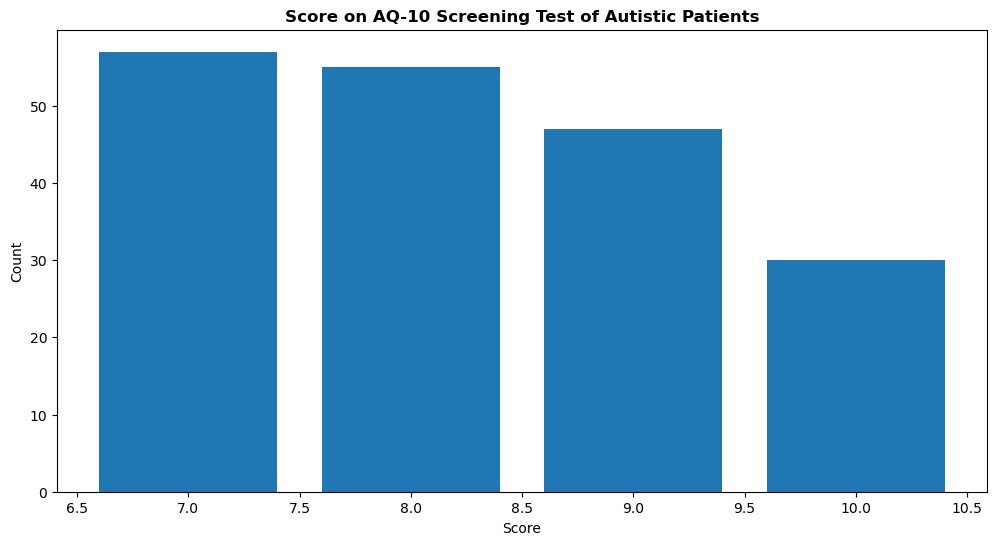

In [317]:
fig, ax = plt.subplots(figsize=(12,6))
bar4 = ax.bar(df_autistic["result"].value_counts().index,df_autistic["result"].value_counts());
ax.set(xlabel="Score", ylabel = "Count");
ax.set_title("Score on AQ-10 Screening Test of Autistic Patients", fontweight='bold');